In [3]:
pwd

'/home/wsuser/work'

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_510999f38903487497fbc99735bf48cd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Ig4p6faRxMBdaxi8-fJMc_27dULIWOOomb880nxXxYn0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_510999f38903487497fbc99735bf48cd.get_object(Bucket='animalcnn-donotdelete-pr-skgx8f3c2lw5sk', Key='Animal_Dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [5]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [7]:
ls -1

dataset/


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
pwd

'/home/wsuser/work'

In [13]:
ls

dataset/


In [14]:
cd /home/wsuser/work/dataset

/home/wsuser/work/dataset


In [15]:
ls

Testing/  Training/


In [17]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/dataset/Training",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 1238 images belonging to 4 classes.


In [19]:
x_test=test_datagen.flow_from_directory(r"/home/wsuser/work/dataset/Testing",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 326 images belonging to 4 classes.


In [20]:
len(x_test)

14

In [21]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

# CNN

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [25]:
model=Sequential()

In [26]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [28]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
model.add(Flatten())

In [30]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [53]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/tmp/wsuser/ipykernel_164/234118701.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
52/52 [==============================] - 9s 166ms/step - loss: 1.4172 - accuracy: 0.4176 - val_loss: 1.0011 - val_accuracy: 0.6074
Epoch 2/10
52/52 [==============================] - 8s 157ms/step - loss: 0.9079 - accuracy: 0.6171 - val_loss: 1.0116 - val_accuracy: 0.5307
Epoch 3/10
52/52 [==============================] - 9s 171ms/step - loss: 0.7652 - accuracy: 0.6947 - val_loss: 0.5127 - val_accuracy: 0.7945
Epoch 4/10
52/52 [==============================] - 9s 168ms/step - loss: 0.6624 - accuracy: 0.7310 - val_loss: 0.5716 - val_accuracy: 0.7577
Epoch 5/10
52/52 [==============================] - 9s 164ms/step - loss: 0.6025 - accuracy: 0.7754 - val_loss: 0.4122 - val_accuracy: 0.8589
Epoch 6/10
52/52 [==============================] - 9s 168ms/step - loss: 0.4958 - accuracy: 0.8150 - val_loss: 0.2926 - val_accuracy: 0.9018
Epoch 7/10
52/52 [==============================] - 9s 165ms/step - loss: 0.4336 - accuracy: 0.8522 - val_loss: 0.2224 - val_accuracy: 0.9264
Epoch 

In [55]:
model.save('animal.h5')

# Test Model

In [56]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [57]:
model=load_model('animal.h5')

In [64]:
img=image.load_img(r"/home/wsuser/work/dataset/Testing/elephants/images (43).jpeg",target_size=(64,64))

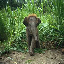

In [65]:
img

In [66]:
x=image.img_to_array(img)

In [67]:
x

array([[[ 40.,  60.,  51.],
        [ 35.,  55.,  46.],
        [ 16.,  36.,  27.],
        ...,
        [ 70., 112.,  48.],
        [ 60., 101.,  45.],
        [ 68., 105.,  61.]],

       [[  9.,  29.,  20.],
        [ 21.,  41.,  32.],
        [ 67.,  87.,  78.],
        ...,
        [ 66., 108.,  44.],
        [ 58.,  99.,  43.],
        [ 81., 117.,  79.]],

       [[ 16.,  36.,  25.],
        [ 34.,  54.,  43.],
        [ 29.,  49.,  38.],
        ...,
        [ 44.,  86.,  22.],
        [ 51.,  91.,  39.],
        [119., 157., 106.]],

       ...,

       [[103.,  99.,  88.],
        [102.,  99.,  84.],
        [115., 112.,  95.],
        ...,
        [113., 110.,  93.],
        [123., 121., 106.],
        [129., 124., 105.]],

       [[ 54.,  49.,  45.],
        [ 53.,  48.,  42.],
        [ 83.,  79.,  70.],
        ...,
        [129., 123., 109.],
        [107., 103.,  91.],
        [109., 104.,  85.]],

       [[ 61.,  69.,  56.],
        [ 76.,  81.,  75.],
        [ 92.,  

In [68]:
x.ndim

3

In [70]:
x=np.expand_dims(x,axis=0)

In [71]:
x.ndim

4

In [72]:
pred=np.argmax(model.predict(x),axis=1)

In [73]:
pred

array([2])

In [74]:
index = ['bears', 'crows', 'elephants', 'rats']

In [76]:
index[pred[0]]

'elephants'

In [79]:
img=image.load_img(r"/home/wsuser/work/dataset/Testing/bears/k4 (73).jpeg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)
index = ['bears', 'crows', 'elephants', 'rats']
print(index[pred[0]])

crows


In [81]:
img=image.load_img(r"/home/wsuser/work/dataset/Testing/crows/Z1  (31).jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)
index = ['bears', 'crows', 'elephants', 'rats']
print(index[pred[0]])

crows
